# 二次元配列と勾配問題
機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。

この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 【問題1】1次関数
x
 が-50から50の範囲で次の式を考えます。
 
y
=
1/
2
x
+
1-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [2]:
x=np.arange(-50, 50+0.1, 0.1)

In [3]:
#func関数の作成
def func(x):
    y=(1/2)*x+1
    return y

In [4]:
#テスト
y=func(x)
y

array([-24.  , -23.95, -23.9 , ...,  25.9 ,  25.95,  26.  ])

## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [5]:
xy = np.vstack((x, y)).T
xy.shape #(1001, 2)に転置させる

(1001, 2)

# 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

$$
勾配 = \frac{dy}{dx}
$$

厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

In [30]:
dx=x[1:]-x[:-1] #インデックス1より後ろの配列　- 一番最後の要素の１つ前までの配列
dy=y[1:]-y[:-1] #同上
grad=dy/dx

## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

[matplotlib.pyplot.plot — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html)

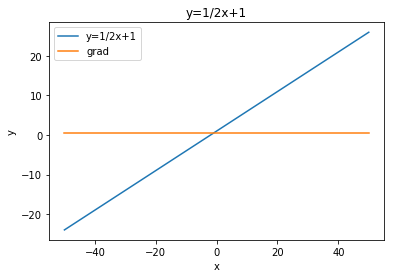

In [7]:
#shapeを合わせる
gradplus=np.append(grad, 0.5)
#y=1/2x+1
plt.plot(x,y,label="y=1/2x+1")
#grad
plt.plot(x,gradplus, label="grad")
plt.legend()
plt.title("y=1/2x+1")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 【問題5】Pythonの関数化

In [58]:
def compute_gradient(f,x=np.arange(-50, 50.1, 0.1)):
    y=f(x)
   
    dx=x[1:]-x[:-1]
    dy=y[1:]-y[:-1]
    grad=dy/dx
    
    xy=np.vstack((x,y)).T
    
    return y,grad,xy

$y=x^2(-50=< x =<50)$

In [59]:
def func_1(x):
    y=x**2
    return y

$y=2x^2+2^x  (-50=< x =<50)$

In [60]:
def func_2(x):
    y=2*x**2+2**x
    return y

$y=sinx^{1/2}  (0=< x =<50)$

In [61]:
def func_3(x):
    y = np.sin(x**0.5)
    return y

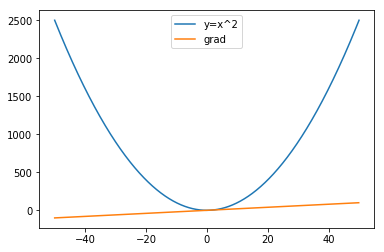

In [64]:
y_1,grad_1,xy_1=compute_gradient(func_1)
xy_1_del=np.delete(xy_1,-1,0)
plt.plot(x,y_1,label="y=x^2")
plt.plot(xy_1_del[:,0],grad_1,label="grad")
plt.legend()
plt.show()

$y=2x^2+2^x  (-50=< x =<50)$

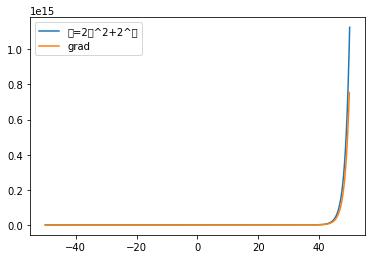

In [66]:
y_2,grad_2,xy_2=compute_gradient(func_2)
xy_2_del=np.delete(xy_2,-1,0)
plt.plot(x,y_2,label="𝑦=2𝑥^2+2^𝑥")
plt.plot(xy_2_del[:,0],grad_2,label="grad")
plt.legend()
plt.show()

$y=sinx^{1/2}  (0=< x =<50)$

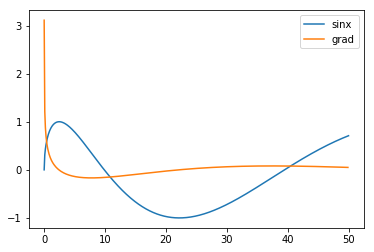

In [71]:
x_3=np.arange(0,50.1,0.1)
y_3,grad_3,xy_3=compute_gradient(func_3,x_3)
xy_3_del=np.delete(xy_3,-1,0)
plt.plot(x_3,y_3,label="sinx")
plt.plot(xy_3_del[:,0],grad_3,label="grad")
plt.legend()
plt.show()

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください

参考文献

[Jupyter Notebook で数式を美しく書く](https://qiita.com/namoshika/items/63db972bfd1030f8264a)

$y=x^2(-50=< x =<50)$

In [146]:
x = g_1[0][:,0]#compute_gradient(x**2)で取得したxy結合配列のx配列を代入
y = g_1[0][:,1]#compute_gradient(x**2)で取得したxy結合配列のy配列を代入
idx = y.argmin()#y最小値のインデックス取得
y_min=y.min()# y最小値取得

print("最小値をとるインデックスは{}".format(idx))
print("yの最小値は{}".format(y_min))
print("yの最小値直前の勾配は{}".format(g_1[1][idx-1]))
print("yの最小値直後の勾配は{}".format(g_1[1][idx]))

最小値をとるインデックスは500
yの最小値は5.048709793414476e-25
yの最小値直前の勾配は-0.09999999999858034
yの最小値直後の勾配は0.1000000000014225


$y=2x^2+2^x  (-50=< x =<50)$

In [147]:
x2 = g_2[0][:,0]#compute_gradient(2*x**2 + 2**x)で取得したxy結合配列のx配列を代入
y2 = g_2[0][:,1]#compute_gradient(2*x**2 + 2**x)で取得したxy結合配列のy配列を代入
idx2 = y2.argmin()#y最小値のインデックス取得
y2_min = y2.min()# y最小値取得

print("最小値をとるインデックスは{}".format(idx2))
print("yの最小値は{}".format(y2_min))
print("yの最小値直前の勾配は{}".format(g_2[1][idx2-1]))
print("yの最小値直後の勾配は{}".format(g_2[1][idx2]))

最小値をとるインデックスは498
yの最小値は0.9505505632959851
yの最小値直前の勾配は-0.4170183305979998
yの最小値直後の勾配は0.024824282409972788


$y=sinx^{1/2}  (0=< x =<50)$

In [148]:
x3 = t_xy_merge[:,0]#function(x)を用いて、𝑦=𝑠𝑖𝑛𝑥1/2(0=<𝑥=<50)の取得したxy結合配列のx配列を代入
y3 = t_xy_merge[:,1]#function(x)を用いて、𝑦=𝑠𝑖𝑛𝑥1/2(0=<𝑥=<50)の取得したxy結合配列のy配列を代入
idx3 = y3.argmin()#y最小値のインデックス取得
y3_min = y3.min()# y最小値取得

print("最小値をとるインデックスは{}".format(idx3))
print("yの最小値は{}".format(y3_min))
print("yの最小値直前の勾配は{}".format(gradient[idx3-1]))
print("yの最小値直後の勾配は{}".format(gradient[idx3]))

最小値をとるインデックスは222
yの最小値は-0.9999997540298113
yの最小値直前の勾配は-0.0006388422559544435
yの最小値直後の勾配は0.0004874477930660974


考察：yの最小値をとる前後で勾配の正負がマイナスからプラスになることがわかる。